# Predicting risk factors for maternal mortality
by Apoorva Srivastava, Guaner (Gloria) Yi, Jeffrey Ding & Randall Lee 2025/11/22

In [68]:
import numpy as np
import pandas as pd
import requests
import zipfile
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.metrics import fbeta_score, make_scorer, recall_score, ConfusionMatrixDisplay, confusion_matrix

# Summary
Fill in with summary...

# Introduction
Fill in with introduction...

# Methods

## Data
The data set used in this project is of health conditions of pregnant women from the rural areas of Bangladesh created by Marzia Ahmed at Daffodil International University. This dataset was sourced from the UC Irvine Machine Learning Repository and can be found [here](https://archive.ics.uci.edu/dataset/863/maternal+health+risk). Each observation in the dataset corresponds to a pregnant individual's health profile, comprising a risk intensity level (low, medium, or high risk) and associated clinical measurements including demographic information (age) and vital signs (systolic blood pressure, diastolic blood pressure, blood glucose concentration, body temperature, and resting heart rate). The data set was collected via an IoT-based risk monitoring system from hospitals, community clinics, and maternal health cares in rural Bangladesh.

### Data dictionary
| Column Name | Role    | Type        | Description |
|-------------|---------|-------------|-------------|
| Age         | Feature | Integer     | Age of the patient during pregnancy (in years) |
| SystolicBP  | Feature | Integer     | Systolic (upper) blood pressure measured in mmHg |
| DiastolicBP | Feature | Integer     | Diastolic (lower) blood pressure measured in mmHg |
| BS          | Feature | Integer     | Blood sugar level measured in mmol/L |
| BodyTemp    | Feature | Integer     | Body temperature of the patient measured in °F |
| HeartRate   | Feature | Integer     | Patient's resting heart rate measured in bpm |
| RiskLevel   | Target  | Categorical | Predicted pregnancy risk level based on clinical features |

## Analysis
Fill in with analysis...
- SVC (Support Vector Classification) algorithm used

## Results & Discussion
Fill in with Results & Discussion...

In [69]:
# download data as zip and extract
url = "https://archive.ics.uci.edu/static/public/863/maternal+health+risk.zip"

request = requests.get(url)
with open("../data/raw/maternal+health+risk.zip", 'wb') as f:
    f.write(request.content)

with zipfile.ZipFile("../data/raw/maternal+health+risk.zip", 'r') as zip_ref:
    zip_ref.extractall("../data/raw")

In [70]:
health_data = pd.read_csv("../data/raw/Maternal Health Risk Data Set.csv", header=0)
health_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [71]:
health_data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [72]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [73]:
train_df, test_df = train_test_split(
    health_data, test_size=0.3, random_state=522
)
X_train, y_train = train_df.drop(columns=['RiskLevel']), train_df["RiskLevel"]
X_test, y_test = test_df.drop(columns=['RiskLevel']), test_df["RiskLevel"]

In [74]:
train_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
505,17,70,50,7.9,98.0,70,low risk
72,19,120,80,7.0,98.0,70,mid risk
497,19,120,80,7.0,98.0,70,low risk
813,29,130,70,7.5,98.0,78,mid risk
795,35,120,60,6.1,98.0,76,mid risk
...,...,...,...,...,...,...,...
330,35,120,60,6.9,98.0,70,low risk
407,22,100,65,6.8,98.0,88,low risk
288,26,85,60,6.0,101.0,86,mid risk
875,32,120,65,6.0,101.0,76,mid risk


In [75]:
test_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
328,35,90,70,6.9,98.0,70,low risk
421,22,100,65,6.8,98.0,88,low risk
587,28,90,60,7.5,98.0,82,mid risk
261,19,120,75,6.9,98.0,66,low risk
262,40,160,100,19.0,98.0,77,high risk
...,...,...,...,...,...,...,...
808,23,120,90,7.9,98.0,70,mid risk
871,29,130,70,6.7,98.0,78,mid risk
703,15,100,49,7.6,98.0,77,low risk
538,40,160,100,19.0,98.0,77,high risk


In [76]:
y_train.value_counts()

RiskLevel
low risk     275
mid risk     237
high risk    197
Name: count, dtype: int64

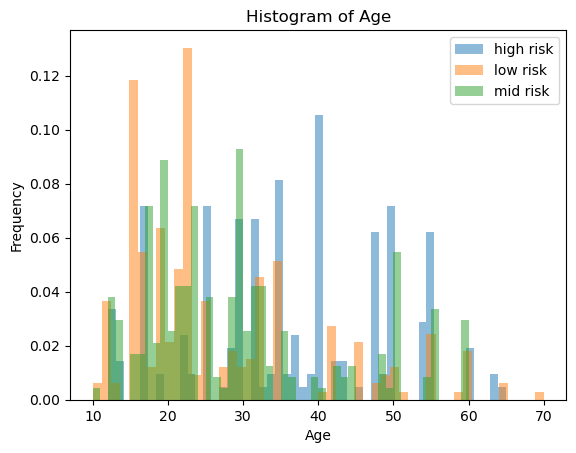

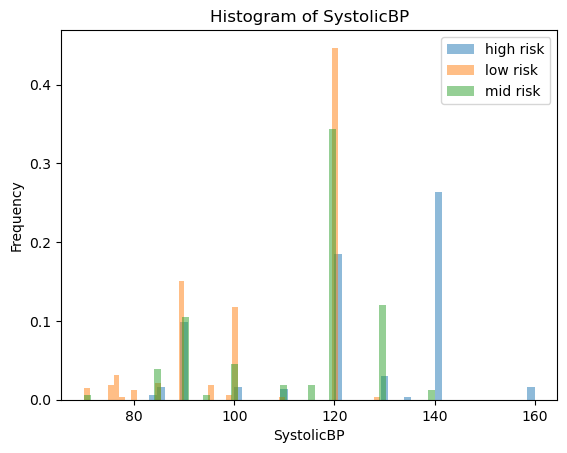

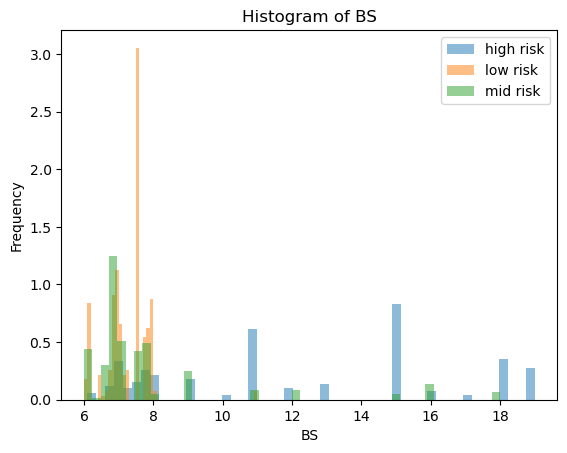

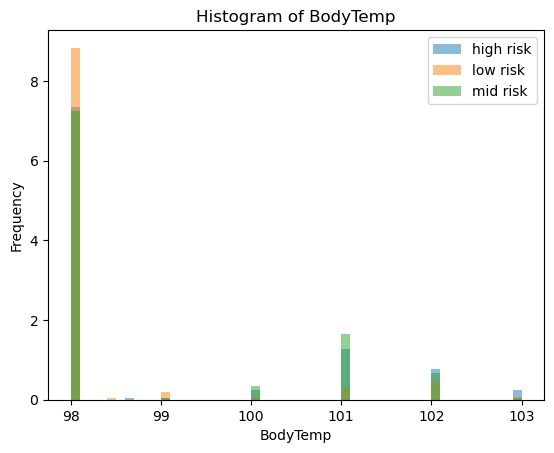

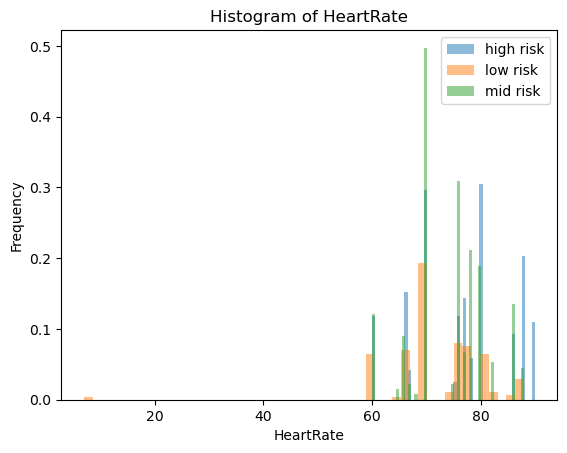

In [77]:
feature_cols = ["Age", "SystolicBP", "BS", "BodyTemp", "HeartRate"]

for feature in feature_cols:
    train_df.groupby("RiskLevel")[feature].plot.hist(bins=50, alpha=0.5, legend=True, density = True, title = "Histogram of " + feature);
    plt.xlabel(feature);
    plt.show()

Figure 1. Comparison of the distributions of features contributing to the risk intensity level during pregnancy of an individual.

We selected a Support Vector Classifier (SVC) model for this classification task. To identify the model configuration that best predicted maternal health risk levels, we performed hyperparameter tuning using randomized search with 10-fold cross-validation and recall score (weighted) as our evaluation metric to select the optimal values for C (regularization parameter), gamma (kernel coefficient). We found that the optimal hyperparameters were 760 for C and 5.8 for gamma.

In [78]:
preprocessor = make_column_transformer(
    (StandardScaler(), feature_cols)
)

In [79]:
preprocessor.fit(X_train)

,transformers,"[('standardscaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [80]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train), 
    index=X_train.index, 
    columns=preprocessor.get_feature_names_out()
)  

# Show the transformed data
X_train_enc

,standardscaler__Age,standardscaler__SystolicBP,standardscaler__BS,standardscaler__BodyTemp,standardscaler__HeartRate
505,-0.966639,-2.360802,-0.266071,-0.490243,-0.484656
72,-0.816475,0.367848,-0.536426,-0.490243,-0.484656
497,-0.816475,0.367848,-0.536426,-0.490243,-0.484656
813,-0.065657,0.913578,-0.386229,-0.490243,0.467532
795,0.384834,0.367848,-0.806781,-0.490243,0.229485
...,...,...,...,...,...
330,0.384834,0.367848,-0.566466,-0.490243,-0.484656
407,-0.591230,-0.723612,-0.596505,-0.490243,1.657767
288,-0.290902,-1.542207,-0.836820,1.714296,1.419720
875,0.159589,0.367848,-0.836820,1.714296,0.229485


In [16]:
dc = DummyClassifier()

In [17]:
dc_score = pd.DataFrame(cross_validate(dc, X_train, y_train, cv=5, return_train_score=True))

In [18]:
dc_score

,fit_time,score_time,test_score,train_score
0,0.000780,0.000636,0.387324,0.388007
1,0.000351,0.000301,0.387324,0.388007
2,0.000331,0.000292,0.387324,0.388007
3,0.000410,0.000296,0.387324,0.388007
4,0.000308,0.000245,0.390071,0.387324


In [22]:
svc = make_pipeline(preprocessor, SVC())

In [23]:
svc_score = pd.DataFrame(cross_validate(svc, X_train, y_train, cv=5, return_train_score=True))

In [24]:
svc_score

,fit_time,score_time,test_score,train_score
0,0.009515,0.003789,0.669014,0.724868
1,0.007184,0.003756,0.704225,0.705467
2,0.006986,0.003551,0.683099,0.726631
3,0.006931,0.003729,0.697183,0.714286
4,0.006695,0.003593,0.695035,0.721831


- Use recall score as the evaluation metric because it measures the percentage of actual high-risk 
- pregnancies correctly identified. This is critical for maternal health where missing high-risk cases 
- (false negatives) could be dangerous. Recall prioritizes catching all high-risk cases, even if it 
- means more false alarms, which is acceptable since extra monitoring is safer than missed risks.


In [25]:
svc_score = pd.DataFrame(cross_validate(svc, X_train, y_train, cv=5, return_train_score=True, scoring="recall_weighted"))

In [26]:
svc_score

,fit_time,score_time,test_score,train_score
0,0.007811,0.004591,0.669014,0.724868
1,0.006976,0.004418,0.704225,0.705467
2,0.006742,0.004384,0.683099,0.726631
3,0.006386,0.004283,0.697183,0.714286
4,0.006480,0.004313,0.695035,0.721831


In [27]:
param_grid = {
    "svc__C": loguniform(1e-2, 1e3),
    "svc__gamma": loguniform(1e-4, 1e1)
}

In [28]:
random_search = RandomizedSearchCV(svc,                                    
                  param_distributions=param_grid, 
                  n_iter=100, 
                  n_jobs=-1,
                  return_train_score=True,
                  cv=10,
                  scoring='recall_weighted')

random_search.fit(X_train, y_train)

,estimator,"Pipeline(step...svc', SVC())])"
,param_distributions,"{'svc__C': <scipy.stats....t 0x184613b00>, 'svc__gamma': <scipy.stats....t 0x1845d9880>}"
,n_iter,100
,scoring,'recall_weighted'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [29]:
random_search.best_score_

np.float64(0.7913078470824949)

In [30]:
result_grid = pd.DataFrame(random_search.cv_results_)
result_grid = result_grid[
    [
        "mean_test_score",
        "param_svc__gamma",
        "param_svc__C",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T.iloc[:, :10]

result_grid

rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_test_score,0.791308,0.787082,0.787062,0.781489,0.775835,0.774427,0.772998,0.771569,0.771549,0.771529
param_svc__gamma,5.773250,1.024768,2.740235,8.616513,7.917037,6.395502,4.965702,3.986779,0.887391,2.414478
param_svc__C,759.666739,744.212255,54.228891,281.643655,85.504798,24.265314,22.856011,34.985133,393.997886,15.334545
mean_fit_time,0.022852,0.028992,0.020702,0.017729,0.021304,0.020335,0.022011,0.022890,0.027315,0.013118


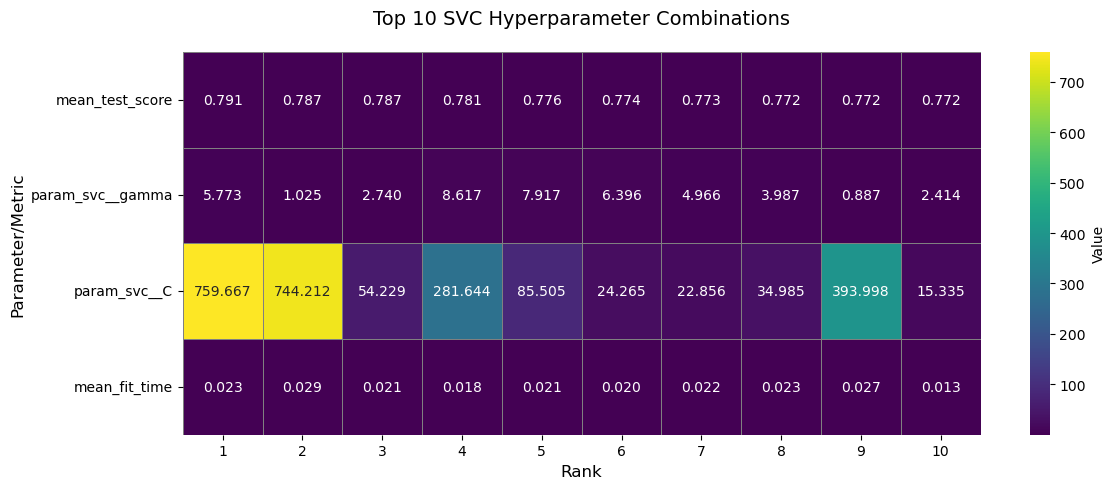

In [32]:
plt.figure(figsize=(12, 5))
sns.heatmap(result_grid, 
            annot=True,           
            fmt='.3f',           
            cmap='viridis',        
            cbar_kws={'label': 'Value'},
            linewidths=0.5,       # Lines between cells
            linecolor='gray')

plt.title('Top 10 SVC Hyperparameter Combinations', fontsize=14, pad=20)
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Parameter/Metric', fontsize=12)
plt.tight_layout()
plt.show()

Figure 2. Results from hyperparameter optimization and 10-fold cross validation to choose gamma and C. Recall score was used as the classification metric as gamma and C was varied.

In [34]:
accuracy_score = random_search.score(
    X_test, y_test
)

In [35]:
accuracy_score

0.7934426229508197

In [40]:
maternal_preds = X_test.assign(
    predicted=random_search.best_estimator_.predict(X_test)
)

# Add the actual labels
maternal_preds['actual'] = y_test.values

# Compute recall score (weighted for multi-class)
recall = recall_score(
    maternal_preds['actual'],
    maternal_preds['predicted'],
    average='weighted'
)

In [41]:
recall

0.7934426229508197

In [46]:
pd.crosstab(
    maternal_preds["actual"],
    maternal_preds["predicted"],
)

predicted,high risk,low risk,mid risk
actual,,,
high risk,68,3,4
low risk,3,98,30
mid risk,6,17,76


Text(0.5, 1.0, 'Confusion Matrix - Test Data')

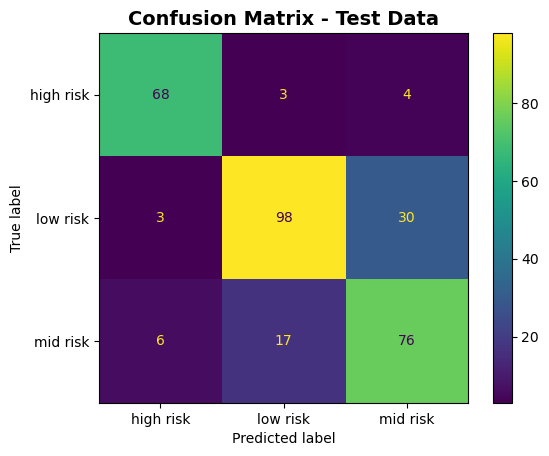

In [63]:
confmat_logreg_bal = ConfusionMatrixDisplay.from_predictions(
    y_test,
    random_search.best_estimator_.predict(X_test),
    #normalize='all'
)
confmat_logreg_bal.ax_.set_title('Confusion Matrix - Test Data', fontsize=14, fontweight='bold')

Figure 3. Confusion matrix of model performance on test data.

## Summary of model results
Fill in with summary of results...

## References

Fill in with references...